### Build a Simple workflow or graph using LangGraph

#### State

First,define the State of the graph
The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypeDict class from python's typing module as our schema,which provides type hints for the keys.

In [1]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

#### Nodes
Nodes are just python function
The first positional argument is the state, as deffined above.

Because the state is a TypeDict with schema as defined above, each node can access the key, graph_state,with state ['graph_state']

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [11]:
def start_play(state: State):
    print("Start_Play node has been called")
    return {"graph_info":state["graph_info"] + "I am planning to play"}  # variable inside class State

def cricket(state: State):
    print("My Cricket Node has been Called")
    return {"graph_info":state['graph_info']+ "Cricket"}

def Badminton(state: State):
    print("Badminton node has been started")
    return {"graph_info":state['graph_info']+ "Badminton"}



In [3]:
import random
from typing import Literal

def  random_play(state:State)->Literal['cricket','Badminton']:
    graph_info=state['graph_info']
    
    if random.random()>0.5:
        return "cricket"
    else:
        return "Badminton"


### Graph Construction

Now we build the graph from our components defined above.
The StateGraph class is the graph class that we can use.

First, wee initialize a StateGraph with the State class we defined above.

Then , we add oour nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a specila node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visuaize the graph as a Mermaid diagram.

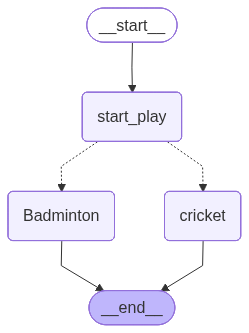

In [8]:
from IPython.display import Image,display
from langgraph.graph import StateGraph, START,END
#Build Graph
graph=StateGraph(State)

#Adding the nodes
graph.add_node("start_play",start_play) # node_name,function_name
graph.add_node("cricket",cricket)
graph.add_node("Badminton",Badminton)

#Schedule the flow of the graph

graph.add_edge(START,"start_play")  #START -node
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("Badminton",END)


# compile the graph
graph_builder=graph.compile()

#View
display(Image(graph_builder.get_graph().draw_mermaid_png()))


#### Graph Invoaction

In [10]:
graph_builder.invoke({"graph_info":"Hey My name is Anjali "})

Start_Play node hhas been called
My Cricket Node has been Called


{'graph_info': 'Hey My name is Anjali I am planning to playCricket'}